In [1]:
from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from netCDF4 import Dataset

import numpy as np

import os

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

#lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout
import MetricsPythonTools as mpt


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('poster')


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
def get_metrics(exp, run, TrNum, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(('results/metricsDataFrames/%srun%sTr%s.csv' %(exp,run,TrNum)))
    col = df[key]
    return col

def get_water(exp, run, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(('results/metricsDataFrames/%srun%s.csv' %(exp,run)))
    col = df[key]
    return col

def get_areas(file, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(file)
    col = df[key]
    return col



In [4]:
#Exp
CGrid = '/Users/Karina/Research/PhD/Tracers/TemporaryData/BARKLEY/run01/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
#CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
CGridOut = Dataset(CGrid)

# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size
numTr = 27 # number of tracers in total 

rc = CGridOut.variables['RC']

xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers


In [5]:
labels = ['Kv=1E-5, Ki=10',
          'Kv=1E-4, Ki=10',
          'Kv=1E-3, Ki=10', #run02
          'Kv=1E-5, Ki=1',
          'Kv=1E-4, Ki=1',
          'Kv=1E-3, Ki=1', # run03
          'Kv=1E-5, Ki=0.1',
          'Kv=1E-4, Ki=0.1',
          'Kv=1E-3, Ki=0.1', #run04
          #'Kv_noc=1E-5, Ki=1', 
          #'Kv_noc=1E-4, Ki=1',
          #'Kv_noc=1E-3, Ki=1',#run07
          'Kv=3.8E-5, Ki=10',
          'Kv=2.8E-5, Ki=10',
          'Kv=1.3E-5, Ki=10', #run09
          'Kv=3.8E-5, Ki=1',
          'Kv=2.8E-5, Ki=1',
          'Kv=1.3E-5, Ki=1',#run10
          'Kv=KTv=KSv=1E-4, Ki=1', # run11
          'Kv=KTv=KSv=1E-3, Ki=1,Kt=Ks',#run12
          'Kv=1E-5, Ki=1,N=0',#run13
          'Kv=1E-4, Ki=1,N=0',
          'Kv=1E-3, Ki=1,N=0',
          'Kv=1E-5, Ki=1,N=half',#run14
          'Kv=1E-4, Ki=1,N=half',
          'Kv=1E-3, Ki=1,N=half',
          'Kv=1E-7(out), 1E-3(in), Ki=1',# 3Drun04
          'Kv=1E-7(out), 1E-4(in), Ki=1', # 3Drun05
          'Kv=1E-5(out), 1E-3(in), Ki=1',# 3Drun06
          'Kv=1E-5(out), 1E-4(in), Ki=1']# 3Drun07

          
         
wlabels = ['run02 - CNT','run03 - CNT','run04 - CNT','run09 - CNT',
           'run10 - CNT','run11 - CNT','run12 - CNT','run13 - CNT','run14 - CNT','run04 - 3D','run05 - 3D','run06 - 3D','run07 - 3D']


times = np.arange(0,nt,1)


In [6]:
# LOAD AREAS
CS1A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS1area' )
CS2A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS2area' )
CS3A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS3area' )
CS3sbA = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS3sbarea' )
CS4A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS4area' )
CS5A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS5area' )
AS1A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'AS1area' )
AS2A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'AS2area' )
LID1A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'LID1area' )
LID2A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'LID2area' )
VolHole = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'VolHole'  )
VoleShwoHole = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'VolShNoHole' )



In [7]:
tracers_3D = ['04','05','06','07'] #run number because there's only 1 tr per run
tracers_CNT03 = ['1','2','3'] # tracer number , constant runs
tracers_CNT09 = ['1','2','3'] # tracer number , average diffusivity runs
tracers_CNT07 = ['1','2','3'] # tracer number , no canyon case
tracers_CNT02 = ['1','2','3'] # tracer number , Kiso=0.1
tracers_CNT04 = ['1','2','3'] # tracer number , Kiso=10
tracers_CNT10 = ['1','2','3'] # tracer number , Kiso=1
tracers_CNT11 = ['2'] # tracer number , Kiso=1, Ks=Kt=10^4
tracers_CNT12 = ['3'] # tracer number , Kiso=1, Ks=Kt=10^3
tracers_CNT13 = ['1','2','3'] # tracer number , Kiso=1, Ks=Kt=10^3
tracers_CNT14 = ['1','2','3'] # tracer number , Kiso=1, half N

# LOAD TRACER ON SHELF DATA

TrOnSh = np.zeros((nt,numTr))
HWC = np.zeros((nt,numTr))

kk = 0

fields = ['TronShelfwHole', 'HCWonShelfwHole','TronHole','HCWonHole']

for ii in tracers_CNT02:

    TrOnShwHole = get_metrics('CNTDIFF_hole_',  '02',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_',  '02',ii, fields[2] )

    TrOnSh[:,kk] =  TrOnHole

    HWCsh = get_metrics('CNTDIFF_hole_', '02',ii, fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '02', ii,fields[3] )
    HWC[:,kk] =  HWChole

    kk=kk+1

for ii in tracers_CNT03:

    TrOnShwHole = get_metrics('CNTDIFF_hole_',  '03',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_', '03', ii, fields[2] )

    TrOnSh[:,kk] = TrOnHole

    HWCsh = get_metrics('CNTDIFF_hole_',  '03', ii,fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '03',ii,  fields[3] )

    HWC[:,kk] =  HWChole
    kk=kk+1

for ii in tracers_CNT04:

    TrOnShwHole = get_metrics('CNTDIFF_hole_',  '04',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_', '04',ii, fields[2] )

    TrOnSh[:,kk] =  TrOnHole

    HWCsh = get_metrics('CNTDIFF_hole_',  '04',ii, fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '04',ii, fields[3] )
    HWC[:,kk] =  HWChole
    kk=kk+1

#for ii in tracers_CNT07:


#    TrSh = get_metrics('CNTDIFF_hole_', '07', ii, fields[0] )
#    TrHole= get_metrics('CNTDIFF_hole_', '07', ii, fields[2] )

#    HWCSh = get_metrics('CNTDIFF_hole_', '07', ii, fields[1] )
#    HWCHole = get_metrics('CNTDIFF_hole_', '07', ii, fields[3] )

#    TrOnSh[:,kk] =  TrHole+ TrOnShwHole
#    HWC[:,kk] =  HWCHole+ HWCsh

#    kk=kk+1

for ii in tracers_CNT09:

    TrOnShwHole = get_metrics('CNTDIFF_hole_',  '09',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_','09',ii, fields[2] )

    TrOnSh[:,kk] = TrOnHole

    HWCsh = get_metrics('CNTDIFF_hole_',  '09',ii, fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '09',ii, fields[3] )

    HWC[:,kk] =  HWChole

    kk=kk+1


for ii in tracers_CNT10:

    TrOnShwHole = get_metrics('CNTDIFF_hole_', '10',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_', '10',ii, fields[2] )

    TrOnSh[:,kk] = TrOnHole

    HWCsh = get_metrics('CNTDIFF_hole_', '10',ii, fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '10',ii, fields[3] )

    HWC[:,kk] =  HWChole 
    kk=kk+1

for ii in tracers_CNT11:

    TrOnShwHole = get_metrics('CNTDIFF_hole_', '11',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_', '11',ii, fields[2] )

    TrOnSh[:,kk] = TrOnHole

    HWCsh = get_metrics('CNTDIFF_hole_', '11',ii, fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '11',ii, fields[3] )

    HWC[:,kk] =  HWChole
    kk=kk+1

for ii in tracers_CNT12:

    TrOnShwHole = get_metrics('CNTDIFF_hole_', '12',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_', '12',ii, fields[2] )

    TrOnSh[:,kk] = TrOnHole

    HWCsh = get_metrics('CNTDIFF_hole_', '12',ii, fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '12',ii, fields[3] )

    HWC[:,kk] =  HWChole
    kk=kk+1

for ii in tracers_CNT13:

    TrOnShwHole = get_metrics('CNTDIFF_hole_', '13',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_', '13',ii, fields[2] )

    TrOnSh[:,kk] = TrOnHole

    HWCsh = get_metrics('CNTDIFF_hole_', '13',ii, fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '13',ii, fields[3] )

    HWC[:,kk] =  HWChole
    kk=kk+1

for ii in tracers_CNT14:

    TrOnShwHole = get_metrics('CNTDIFF_hole_', '14',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_', '14',ii, fields[2] )

    TrOnSh[:,kk] = TrOnHole

    HWCsh = get_metrics('CNTDIFF_hole_', '14',ii, fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '14',ii, fields[3] )

    HWC[:,kk] =  HWChole
    kk=kk+1

for ii in tracers_3D:

    TrOnShwHole = get_metrics('3DDIFF_hole_', ii, '1', fields[0] )
    TrOnHole = get_metrics('3DDIFF_hole_', ii, '1', fields[2] )

    TrOnSh[:,kk] =  TrOnHole

    HWCsh = get_metrics('3DDIFF_hole_', ii, '1', fields[1] )
    HWChole = get_metrics('3DDIFF_hole_', ii, '1', fields[3] )


    HWC[:,kk] =  HWChole

    kk=kk+1

In [8]:
tracers_3D = ['04','05','06','07'] #run number because there's only 1 tr per run
tracers_CNT03 = ['1','2','3'] # tracer number , constant runs
tracers_CNT09 = ['1','2','3'] # tracer number , average diffusivity runs
#tracers_CNT07 = ['1','2','3'] # tracer number , no canyon case
tracers_CNT02 = ['1','2','3'] # tracer number , Kiso=0.1
tracers_CNT04 = ['1','2','3'] # tracer number , Kiso=10
tracers_CNT10 = ['1','2','3'] # tracer number , Kiso=1
tracers_CNT11 = ['2'] # tracer number , Kiso=1, Ks=Kt=10^4
tracers_CNT12 = ['3'] # tracer number , Kiso=1, Ks=Kt=10^3
tracers_CNT13 = ['1','2','3'] # tracer number , Kiso=1, no stratification
tracers_CNT14 = ['1','2','3'] # tracer number , Kiso=1, no stratification

# LOAD TRANSPORTS

CS1 = np.zeros((nt-1,numTr))
CS2 = np.zeros((nt-1,numTr))
CS3 = np.zeros((nt-1,numTr))
CS4 = np.zeros((nt-1,numTr))
CS5 = np.zeros((nt-1,numTr))
CS3sb = np.zeros((nt-1,numTr))
AS1 = np.zeros((nt-1,numTr))
AS2 = np.zeros((nt-1,numTr))
LID1 = np.zeros((nt-1,numTr))
LID2 = np.zeros((nt-1,numTr))

CS1a = np.zeros((nt-1,numTr))
CS2a = np.zeros((nt-1,numTr))
CS3a = np.zeros((nt-1,numTr))
CS4a = np.zeros((nt-1,numTr))
CS5a = np.zeros((nt-1,numTr))
CS3sba = np.zeros((nt-1,numTr))
AS1a = np.zeros((nt-1,numTr))
AS2a = np.zeros((nt-1,numTr))
LID1a = np.zeros((nt-1,numTr))
LID2a = np.zeros((nt-1,numTr))

CS1d = np.zeros((nt-1,numTr))
CS2d = np.zeros((nt-1,numTr))
CS3d = np.zeros((nt-1,numTr))
CS4d = np.zeros((nt-1,numTr))
CS5d = np.zeros((nt-1,numTr))
CS3sbd = np.zeros((nt-1,numTr))
AS1d = np.zeros((nt-1,numTr))
AS2d = np.zeros((nt-1,numTr))
LID1d = np.zeros((nt-1,numTr))
LID2d = np.zeros((nt-1,numTr))


kk = 0

fields = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2']
fieldsDiff = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2','LID1i' ,'LID2i']

for ii in tracers_CNT02:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[9] )

    CS1d[:,kk] =  get_metrics('CNTDIFF_CS_DIFFFLUX_', '02',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii, fieldsDiff[11] ))

    kk=kk+1


for ii in tracers_CNT03:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[9] )

    CS1d[:,kk] =  get_metrics('CNTDIFF_CS_DIFFFLUX_', '03',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii, fieldsDiff[11] ))

    kk=kk+1

for ii in tracers_CNT04:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[9] )

    CS1d[:,kk] =  get_metrics('CNTDIFF_CS_DIFFFLUX_', '04',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii,  fieldsDiff[5] )
    AS1d[:,kk] =get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii, fieldsDiff[11] ))


    kk=kk+1

#for ii in tracers_CNT07:

#    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '07', ii, fields[0] )
#    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '07', ii, fields[1] )
#    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '07', ii, fields[2] )
#    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '07', ii, fields[3] )
#    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '07', ii, fields[4] )
#    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '07', ii, fields[5] )
#    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '07', ii, fields[6] )
#    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '07', ii, fields[7] )
#    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '07', ii, fields[8] )
#    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '07', ii, fields[9] )

#    CS1d[:,kk] =  get_metrics('CNTDIFF_CS_DIFFFLUX_', '07',ii,  fieldsDiff[0] )
#    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '07', ii, fieldsDiff[1] )
#    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '07', ii, fieldsDiff[2] )
#    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '07', ii,  fieldsDiff[3] )
#    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '07', ii,  fieldsDiff[4] )
#    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '07', ii,  fieldsDiff[5] )
#   AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '07', ii,  fieldsDiff[6] )
#   AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '07', ii,  fieldsDiff[7] )
#    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '07', ii, fieldsDiff[8] )
#                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '07', ii, fieldsDiff[10] ))
#    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '07', ii, fieldsDiff[9] )
#                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '07', ii, fieldsDiff[11] ))

#    kk=kk+1
for ii in tracers_CNT09:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '09', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '09', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '09', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '09', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '09', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '09', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '09', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '09', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '09', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '09', ii, fields[9] )

    CS1d[:,kk] =  get_metrics('CNTDIFF_CS_DIFFFLUX_', '09',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '09', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '09', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '09', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '09', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '09', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '09', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '09', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '09', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '09', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '09', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '09', ii, fieldsDiff[11] ))

    kk=kk+1



for ii in tracers_CNT10:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '10', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '10', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '10', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '10', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '10', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '10', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '10', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '10', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '10', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '10', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '10',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '10', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '10', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '10', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '10', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '10', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '10', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '10', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '10', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '10', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '10', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '10', ii, fieldsDiff[11] ))


    kk=kk+1

for ii in tracers_CNT11:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii, fieldsDiff[11] ))


    kk=kk+1

for ii in tracers_CNT12:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii, fieldsDiff[11] ))


    kk=kk+1

for ii in tracers_CNT13:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '13', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '13', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '13', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '13', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '13', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '13', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '13', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '13', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '13', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '13', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '13',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '13', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '13', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '13', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '13', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '13', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '13', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '13', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '13', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '13', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '13', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '13', ii, fieldsDiff[11] ))


    kk=kk+1

for ii in tracers_CNT14:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii, fieldsDiff[11] ))


    kk=kk+1

    
for ii in tracers_3D:

    CS1a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[0] )
    CS2a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[1] )
    CS3a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[2] )
    CS3sba[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[3] )
    CS4a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[4] )
    CS5a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[5] )
    AS1a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[6] )
    AS2a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[7] )
    LID1a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[8] )
    LID2a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[9] )

    CS1d[:,kk] =  get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[8] )
                  +get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[9] )
                  +get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[11] ))

    kk=kk+1



CS1 = CS1a +CS1d
CS2 =  CS2a +CS2d
CS3 = CS3a +CS3d
CS4 =  CS4a +CS4d
CS5 = CS5a+ CS5d
CS3sb =  CS3sba +CS3sbd
AS1 = AS1a +AS1d
AS2 =  AS2a +AS2d
LID1 = LID1a+ LID1d
LID2 = LID2a +LID2d


In [9]:
#  LOAD WATER TRANSPORT

numWat = 13

water_3D = ['04','05','06','07'] #run number
water_CNT = ['02','03','04','09','10','11','12','13','14'] # run number , constant runs

wCS1 = np.zeros((nt-1,numWat))
wCS2 = np.zeros((nt-1,numWat))
wCS3 = np.zeros((nt-1,numWat))
wCS4 = np.zeros((nt-1,numWat))
wCS5 = np.zeros((nt-1,numWat))
wCS3sb = np.zeros((nt-1,numWat))
wAS1 = np.zeros((nt-1,numWat))
wAS2 = np.zeros((nt-1,numWat))
wLID1 = np.zeros((nt-1,numWat))
wLID2 = np.zeros((nt-1,numWat))

kk = 0

fields = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2']



for ii in water_CNT:

    wCS1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[0] )
    wCS2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[1] )
    wCS3[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[2] )
    wCS3sb[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[3] )
    wCS4[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[4] )
    wCS5[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[5] )
    wAS1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[6] )
    wAS2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[7] )
    wLID1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[8] )
    wLID2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[9] )
    kk=kk+1

for ii in water_3D:

    wCS1[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[0] )
    wCS2[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[1] )
    wCS3[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[2] )
    wCS3sb[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[3] )
    wCS4[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[4] )
    wCS5[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[5] )
    wAS1[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[6] )
    wAS2[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[7] )
    wLID1[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[8] )
    wLID2[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[9] )

    kk=kk+1


    



In [10]:

### NON-DIMENSIONAL PARAMETERS
kdout = np.array([1.E-5,1.E-4,1.E-3, #run02
                  1.E-5,1.E-4,1.E-3, #run03
                  1.E-5,1.E-4,1.E-3, #run04
                  (3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5, #run09
                  (3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5, #run10
                  1.E-4, #run11
                  1.E-3, #run12
                  1.E-5,1.E-4,1.E-3, #run13
                  1.E-5,1.E-4,1.E-3, #run14
                  1.E-7, #3D run04
                  1.E-7, #3D run05
                  1.E-5, #3D run06
                  1.E-5]) #3D run07

kdTScan = np.array([1.E-5,1.E-5,1.E-5, #run02
                  1.E-5,1.E-5,1.E-5, #run03
                  1.E-5,1.E-5,1.E-5, #run04
                  (1)*1.E-5,(1)*1.E-5,(1)*1.E-5, #run09
                  (1)*1.E-5,(1)*1.E-5,(1)*1.E-5, #run10
                  1.E-4, #run11
                  1.E-3, #run12
                  1.E-5,1.E-5,1.E-5, #run13
                  1.E-5,1.E-5,1.E-5, #run14
                  1.E-3, #3D run04
                  1.E-4, #3D run05
                  1.E-3, #3D run06
                  1.E-4]) #3D run07

kdcan_avg = np.array([1.E-5,1.E-4,1.E-3, #run02
                  1.E-5,1.E-4,1.E-3, #run03
                  1.E-5,1.E-4,1.E-3, #run04
                  (3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5, #run09
                  (3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5, #run10
                  1.E-4, #run11
                  1.E-3, #run12
                  1.E-5,1.E-4,1.E-3, #run13
                  1.E-5,1.E-4,1.E-3, #run14
                  5.0005E-4,#1.E-3, #3D run04
                  5.005E-5, #3D run05
                  5.05E-4, #3D run06
                  5.5E-5]) #3D run07

kdcan = np.array([1.E-5,1.E-4,1.E-3, #run02
                  1.E-5,1.E-4,1.E-3, #run03
                  1.E-5,1.E-4,1.E-3, #run04
                  (3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5, #run09
                  (3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5, #run10
                  1.E-4, #run11
                  1.E-3, #run12
                  1.E-5,1.E-4,1.E-3, #run13
                  1.E-5,1.E-4,1.E-3, #run14
                  1.E-3, #3D run04
                  1.E-4, #3D run05
                  1.E-3, #3D run06
                  1.E-4]) #3D run07

                  
ki = np.array([10.0,10.0,10.0, #run02
               1.0,1.0,1.0, #run03
               0.1,0.1,0.1, #run04
               10.0,10.0,10.0, #run09
               1.0,1.0,1.0, #run10
               1.0, #run11
               1.0, #run12
               1.0,1.0,1.0, #run13
               1.0,1.0,1.0, #run14
               1.0, #3D run04
               1.0, #3D run05
               1.0, #3D run06
               1.0]) #3D run07


Z = 75.0 

#H = np.array([145.0,141.0,141.0,145.0,141.0,153.0,167.0,131.0,133.0,131.0,133.0])
#H_ext = np.array([H[0],H[0],H[0],H[1],H[1],H[1],H[2],H[2],H[2],H[3],H[3],H[3],H[4],H[4],H[4],H[5],H[6],H[7],H[8],H[9],H[10]])               
Wsb = 13000 # m
Ush = 0.18 #m/s
Rup = 5000.0 #m
H = 75.0
Hs = 150.0 #m shelf break depth
W = 8300.0 #m width at mid-length

df = pd.read_csv('results/metricsDataFrames/OmegaUstarCNTand3D_tavg_zavg.csv')
dn = pd.read_csv('results/metricsDataFrames/N_t10max_CM.csv')
                    
U = df['Ustar']
Om = df['Omega']
Nmes = dn['N']

Uvec = np.array([U[0],U[0],U[0],U[1],U[1],U[1],U[2],U[2],U[2],U[3],U[3],U[3],
                 U[4],U[4],U[4],U[5],U[6],U[7],U[7],U[7],U[8],U[8],U[8],
                 U[9],U[10],U[11],U[12]])
Omvec = np.array([Om[0],Om[0],Om[0],Om[1],Om[1],Om[1],Om[2],Om[2],Om[2],Om[3],Om[3],Om[3],
                  Om[4],Om[4],Om[4],Om[5],Om[6],Om[7],Om[7],Om[7],Om[8],Om[8],Om[8]
                  ,Om[9],Om[10],Om[11],Om[12]])

L = 6400.0 # meters
f = 1.E-4

N_ext = np.array([Nmes[0],Nmes[0],Nmes[0],Nmes[1],Nmes[1],Nmes[1],Nmes[2],Nmes[2],Nmes[2],
                  Nmes[3],Nmes[3],Nmes[3],Nmes[4],Nmes[4],Nmes[4],Nmes[5],Nmes[6],0,0,0,
                  Nmes[7],Nmes[7],Nmes[7],Nmes[8],Nmes[9],Nmes[10],Nmes[11]])

N = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,
               5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,0,0,0,3.9E-3,3.9E-3,3.9E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3])

Bu = (N*Hs)/(f*W)

S_active = (N*kdTScan)/((f**2)*(L**2))
S_can = (kdcan_avg)/(N*Hs)
S_out = (N*kdout)/((f**2)*(L**2))

S_I = ((L**2)*N)/ki

Tau_h = (N*L)/Uvec
Tau_v = (N*H)/Omvec

Pe_v = ((f**2)*L*Uvec)/((N**2)*kdcan_avg)
Pe_h = (L*Uvec)/ki

Phi_AH = 1.2*(((Ush**3)*Wsb*(np.sqrt(L)))/(N*f*np.sqrt(Rup**3)))

In [11]:
vertical = LID1+LID2
total = -AS1+AS2+CS3sb

verticala = LID1a+LID2a
totala = -AS1a+AS2a+CS3sba

verticald = LID1d+LID2d
totald = -AS1d+AS2d+CS3sbd

watVert = LID1A[0]*1000.0*wLID1 + LID2A[0]*1000.0*wLID2
watTot  = (-1000.0*AS1A[0]*wAS1+1000.0*AS2A[0]*wAS2+1000.0*CS3sbA[0]*wCS3sb)



## FIGURES ##
sns.set_palette( 'Set1',9)

marker = ['o','o','o','*','*','*','d','d','d','^','^','^','>','>','>','h','.','<','<','<','s','s','s','s']
wmarker = ['o','*','d','^','>','h','.','.','<','s','s','s','s']

indexList = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20,21,22,23,24,25,26]
windexList = [0,1,2,3,4,5,6,8,9,10,11,12]
transEqIndex = [0,3,6,9,12,15,16,20,23,24,25,26]



/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


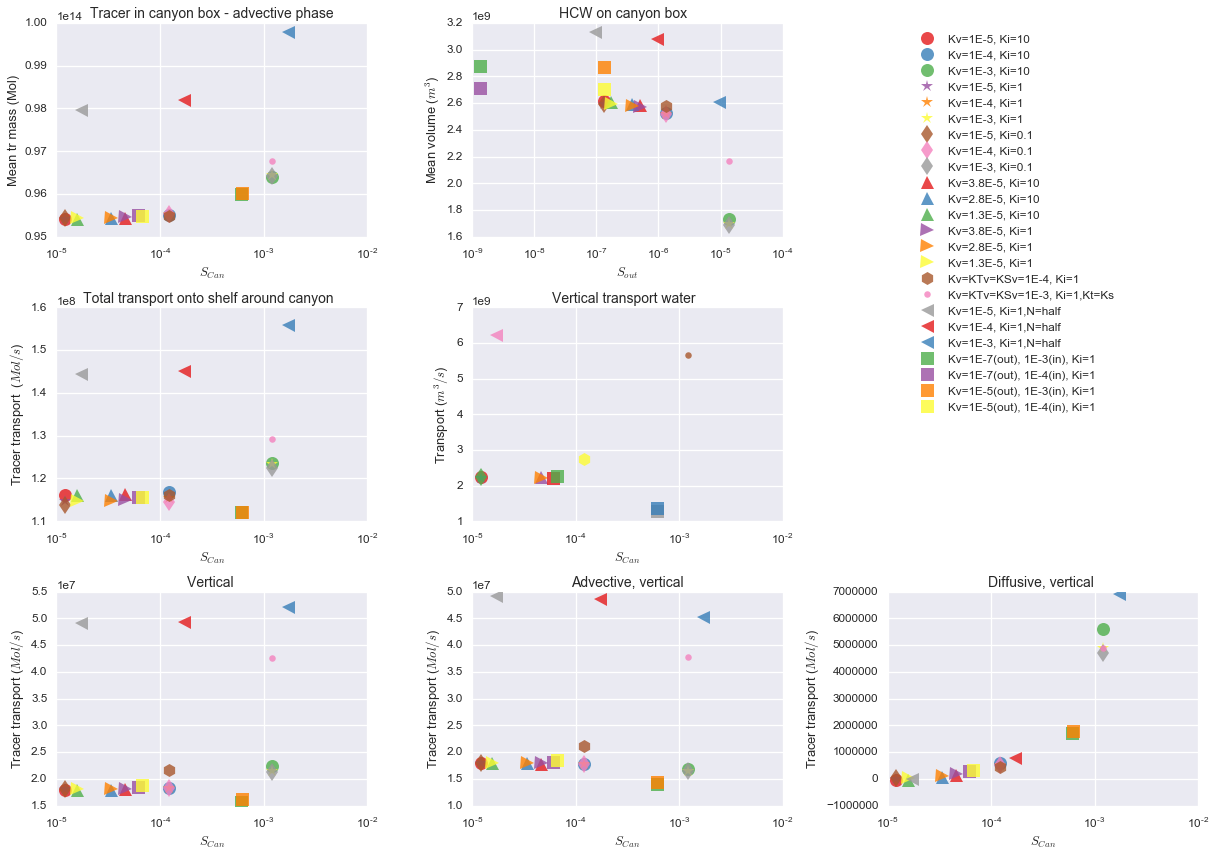

In [12]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(17,12))

jj=0

for ii in indexList:
    ax1 = plt.subplot(3,3,1)
    plt.plot( S_can[ii] ,np.mean(TrOnSh[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean tr mass (Mol)')
    plt.xlabel('$S_{Can}$')
    plt.title(' Tracer in canyon box - advective phase ')
    ax1.set_xscale("log", nonposy='clip')

    ax2 = plt.subplot(3,3,2)
    plt.plot(S_out[ii] , np.nanmean(HWC[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean volume ($m^3$)')
    plt.xlabel('$S_{out}$')
    plt.title('HCW on canyon box  ')
    ax2.set_xscale("log", nonposy='clip')


    ax4 = plt.subplot(3,3,4)
    plt.plot(S_can[ii] , np.mean(total[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport  ($Mol/s$)')
    plt.xlabel('$S_{Can}$')
    plt.title('Total transport onto shelf around canyon  ')
    ax4.set_xscale("log", nonposy='clip')


    ax7 = plt.subplot(3,3,7)
    plt.plot(S_can[ii] , np.mean(vertical[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$S_{Can}$')
    plt.title('Vertical ')
    ax7.set_xscale("log", nonposy='clip')

    ax8 = plt.subplot(3,3,8)
    plt.plot(S_can[ii] , np.mean(verticala[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$S_{Can}$')
    plt.title('Advective, vertical')
    ax8.set_xscale("log", nonposy='clip')

    ax9 = plt.subplot(3,3,9)
    plt.plot(S_can[ii] ,np.mean(verticald[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$S_{Can}$')
    plt.title('Diffusive, vertical ')
    ax9.set_xscale("log", nonposy='clip')


    jj = jj+1

for mm, ii in zip(transEqIndex,windexList):

    ax5 = plt.subplot(3,3,5)

    plt.plot(S_can[mm] , np.nanmean(watVert[10:,ii]),wmarker[ii], markersize = 13,alpha = 0.8,label = wlabels[ii])
    
    plt.ylabel('Transport ($m^3/s$)')
    plt.xlabel('$S_{Can}$')
    plt.title('Vertical transport water  ')
    ax5.set_xscale("log", nonposy='clip')

plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(2.1,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


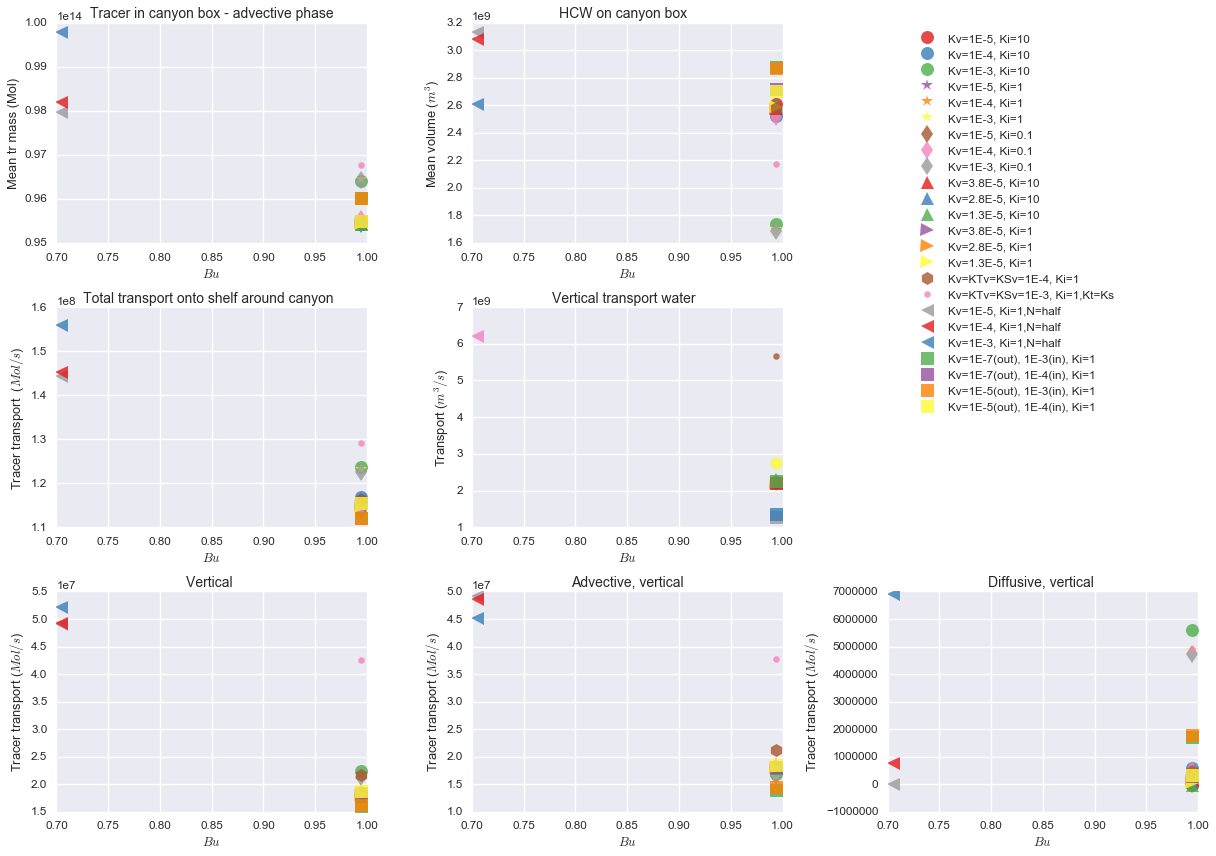

In [13]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(17,12))

jj=0

for ii in indexList:
    ax1 = plt.subplot(3,3,1)
    plt.plot( Bu[ii] ,np.mean(TrOnSh[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean tr mass (Mol)')
    plt.xlabel('$Bu$')
    plt.title(' Tracer in canyon box - advective phase ')
    
    ax2 = plt.subplot(3,3,2)
    plt.plot(Bu[ii] , np.nanmean(HWC[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean volume ($m^3$)')
    plt.xlabel('$Bu$')
    plt.title('HCW on canyon box  ')
    

    ax4 = plt.subplot(3,3,4)
    plt.plot(Bu[ii] , np.mean(total[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport  ($Mol/s$)')
    plt.xlabel('$Bu$')
    plt.title('Total transport onto shelf around canyon  ')
    

    ax7 = plt.subplot(3,3,7)
    plt.plot(Bu[ii] , np.mean(vertical[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$Bu$')
    plt.title('Vertical ')

    ax8 = plt.subplot(3,3,8)
    plt.plot(Bu[ii] , np.mean(verticala[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$Bu$')
    plt.title('Advective, vertical')
    
    ax9 = plt.subplot(3,3,9)
    plt.plot(Bu[ii] ,np.mean(verticald[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$Bu$')
    plt.title('Diffusive, vertical ')
    

    jj = jj+1

for mm, ii in zip(transEqIndex,windexList):

    ax5 = plt.subplot(3,3,5)

    plt.plot(Bu[mm] , np.nanmean(watVert[10:,ii]),wmarker[ii], markersize = 13,alpha = 0.8,label = wlabels[ii])
    plt.ylabel('Transport ($m^3/s$)')
    plt.xlabel('$Bu$')
    plt.title('Vertical transport water  ')
    
plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(2.1,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


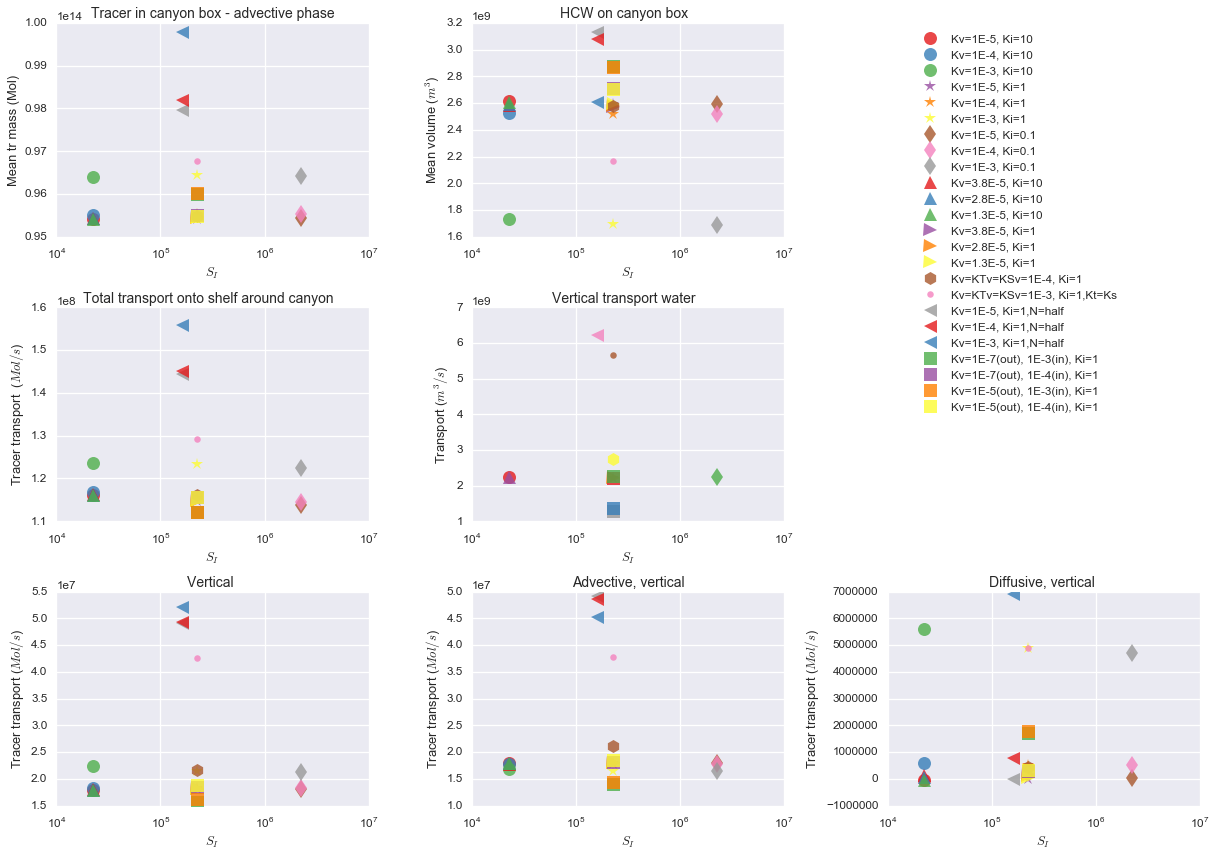

In [14]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(17,12))

jj=0

for ii in indexList:
    ax1 = plt.subplot(3,3,1)
    plt.plot( S_I[ii] ,np.mean(TrOnSh[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean tr mass (Mol)')
    plt.xlabel('$S_I$')
    plt.title(' Tracer in canyon box - advective phase ')
    ax1.set_xscale("log", nonposy='clip')

    ax2 = plt.subplot(3,3,2)
    plt.plot(S_I[ii] , np.nanmean(HWC[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean volume ($m^3$)')
    plt.xlabel('$S_I$')
    plt.title('HCW on canyon box  ')
    ax2.set_xscale("log", nonposy='clip')


    ax4 = plt.subplot(3,3,4)
    plt.plot(S_I[ii] , np.mean(total[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport  ($Mol/s$)')
    plt.xlabel('$S_I$')
    plt.title('Total transport onto shelf around canyon  ')
    ax4.set_xscale("log", nonposy='clip')


    ax7 = plt.subplot(3,3,7)
    plt.plot(S_I[ii] , np.mean(vertical[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$S_I$')
    plt.title('Vertical ')
    ax7.set_xscale("log", nonposy='clip')


    ax8 = plt.subplot(3,3,8)
    plt.plot(S_I[ii] , np.mean(verticala[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$S_I$')
    plt.title('Advective, vertical')
    ax8.set_xscale("log", nonposy='clip')

    ax9 = plt.subplot(3,3,9)
    plt.plot(S_I[ii] ,np.mean(verticald[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$S_I$')
    plt.title('Diffusive, vertical ')
    ax9.set_xscale("log", nonposy='clip')


    jj = jj+1

for mm, ii in zip(transEqIndex,windexList):

    ax5 = plt.subplot(3,3,5)

    plt.plot(S_I[mm] , np.nanmean(watVert[10:,ii]),wmarker[ii], markersize = 13,alpha = 0.8,label = wlabels[ii])
    plt.ylabel('Transport ($m^3/s$)')
    plt.xlabel('$S_I$')
    plt.title('Vertical transport water  ')
    ax5.set_xscale("log", nonposy='clip')

plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(2.1,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


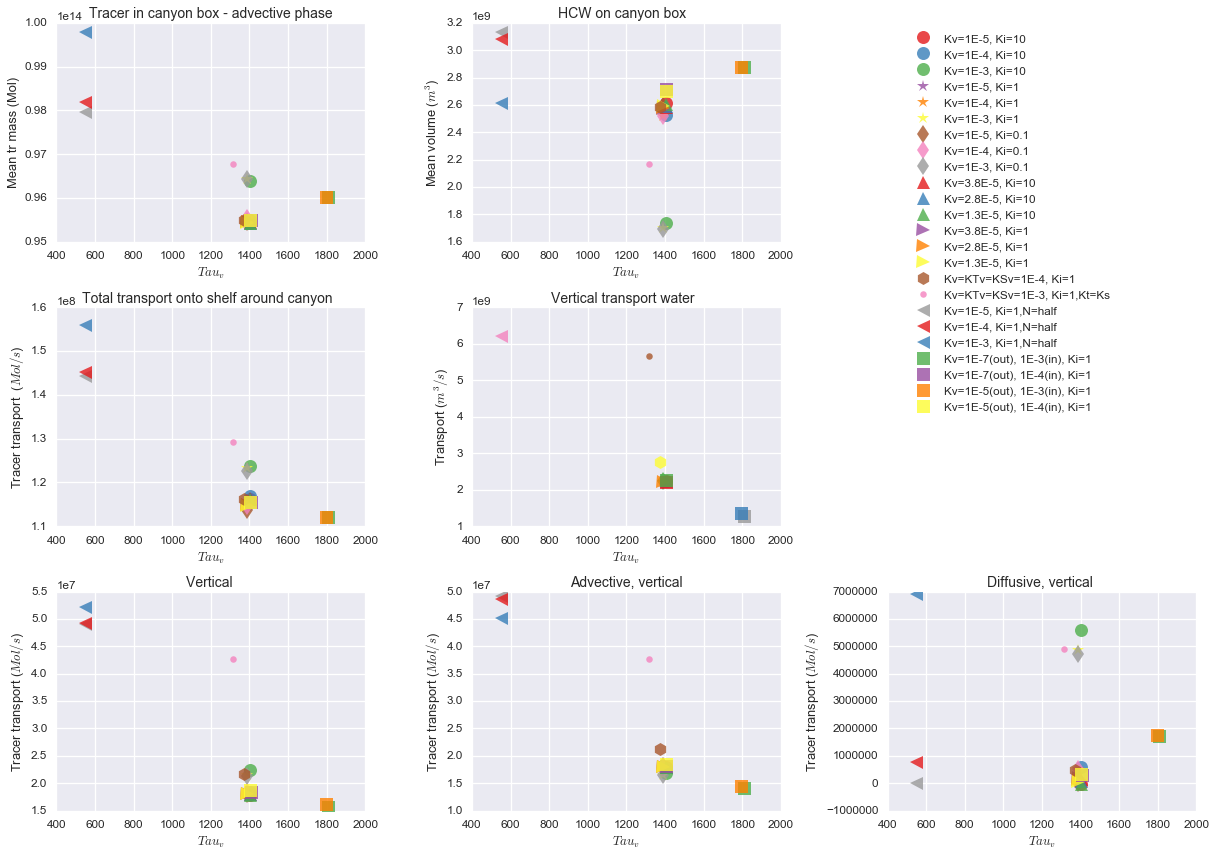

In [15]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(17,12))

jj=0

for ii in indexList:
    ax1 = plt.subplot(3,3,1)
    plt.plot( Tau_v[ii] ,np.mean(TrOnSh[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean tr mass (Mol)')
    plt.xlabel('$Tau_v$')
    plt.title(' Tracer in canyon box - advective phase ')
    #ax1.set_xscale("log", nonposy='clip')

    ax2 = plt.subplot(3,3,2)
    plt.plot(Tau_v[ii] , np.nanmean(HWC[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean volume ($m^3$)')
    plt.xlabel('$Tau_v$')
    plt.title('HCW on canyon box  ')
    #ax2.set_xscale("log", nonposy='clip')


    ax4 = plt.subplot(3,3,4)
    plt.plot(Tau_v[ii] , np.mean(total[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport  ($Mol/s$)')
    plt.xlabel('$Tau_v$')
    plt.title('Total transport onto shelf around canyon  ')
    #ax4.set_xscale("log", nonposy='clip')


    ax7 = plt.subplot(3,3,7)
    plt.plot(Tau_v[ii] , np.mean(vertical[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$Tau_v$')
    plt.title('Vertical ')
    #ax7.set_xscale("log", nonposy='clip')


    ax8 = plt.subplot(3,3,8)
    plt.plot(Tau_v[ii] , np.mean(verticala[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$Tau_v$')
    plt.title('Advective, vertical')
    #ax8.set_xscale("log", nonposy='clip')

    ax9 = plt.subplot(3,3,9)
    plt.plot(Tau_v[ii] ,np.mean(verticald[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$Tau_v$')
    plt.title('Diffusive, vertical ')
    #ax9.set_xscale("log", nonposy='clip')


    jj = jj+1

for mm, ii in zip(transEqIndex,windexList):

    ax5 = plt.subplot(3,3,5)

    plt.plot(Tau_v[mm] , np.nanmean(watVert[10:,ii]),wmarker[ii], markersize = 13,alpha = 0.8,label = wlabels[ii])
    plt.ylabel('Transport ($m^3/s$)')
    plt.xlabel('$Tau_v$')
    plt.title('Vertical transport water  ')
    #ax5.set_xscale("log", nonposy='clip')

plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(2.1,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


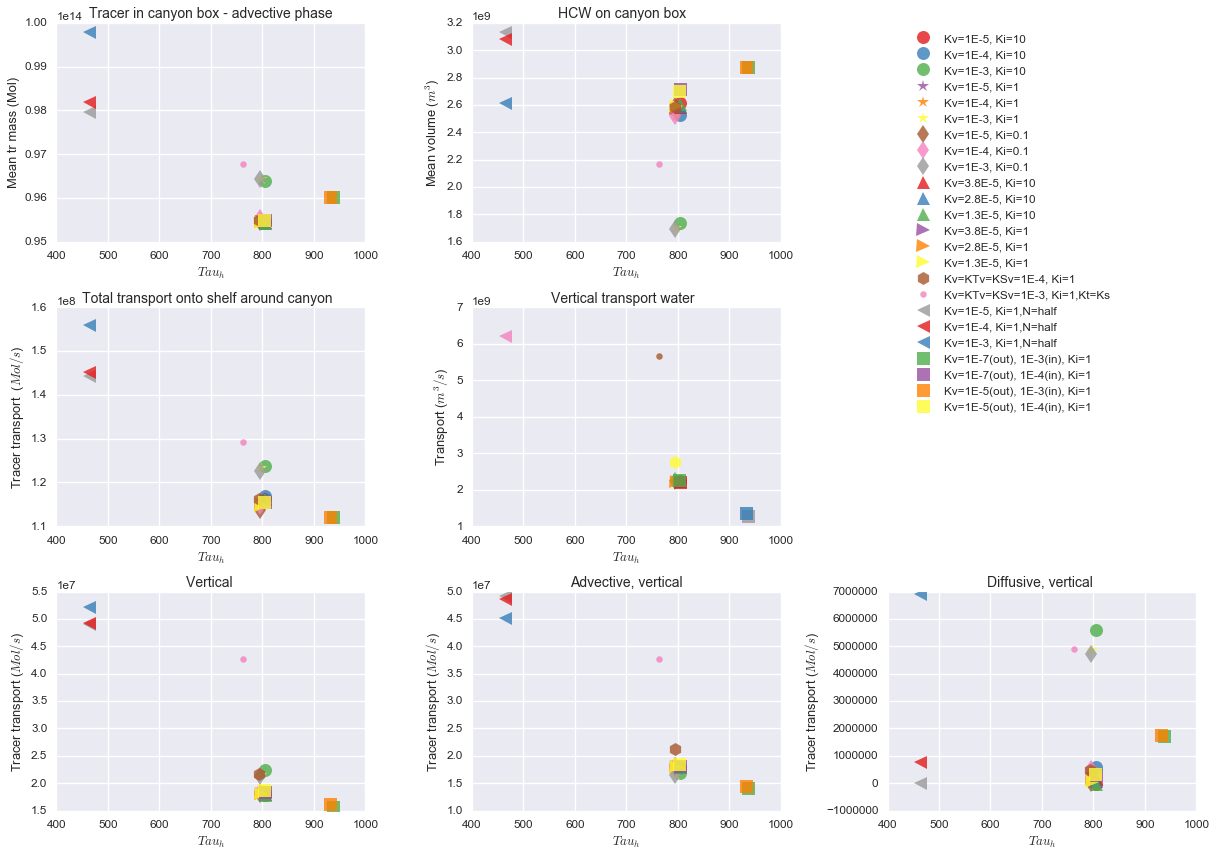

In [16]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(17,12))

jj=0

for ii in indexList:
    ax1 = plt.subplot(3,3,1)
    plt.plot( Tau_h[ii] ,np.mean(TrOnSh[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean tr mass (Mol)')
    plt.xlabel('$Tau_h$')
    plt.title(' Tracer in canyon box - advective phase ')
    #ax1.set_xscale("log", nonposy='clip')

    ax2 = plt.subplot(3,3,2)
    plt.plot(Tau_h[ii] , np.nanmean(HWC[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean volume ($m^3$)')
    plt.xlabel('$Tau_h$')
    plt.title('HCW on canyon box  ')
    #ax2.set_xscale("log", nonposy='clip')


    ax4 = plt.subplot(3,3,4)
    plt.plot(Tau_h[ii] , np.mean(total[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport  ($Mol/s$)')
    plt.xlabel('$Tau_h$')
    plt.title('Total transport onto shelf around canyon  ')
    #ax4.set_xscale("log", nonposy='clip')


    ax7 = plt.subplot(3,3,7)
    plt.plot(Tau_h[ii] , np.mean(vertical[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$Tau_h$')
    plt.title('Vertical ')
    #ax7.set_xscale("log", nonposy='clip')


    ax8 = plt.subplot(3,3,8)
    plt.plot(Tau_h[ii] , np.mean(verticala[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$Tau_h$')
    plt.title('Advective, vertical')
    #ax8.set_xscale("log", nonposy='clip')

    ax9 = plt.subplot(3,3,9)
    plt.plot(Tau_h[ii] ,np.mean(verticald[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$Tau_h$')
    plt.title('Diffusive, vertical ')
    #ax9.set_xscale("log", nonposy='clip')


    jj = jj+1

for mm, ii in zip(transEqIndex,windexList):

    ax5 = plt.subplot(3,3,5)

    plt.plot(Tau_h[mm] , np.nanmean(watVert[10:,ii]),wmarker[ii], markersize = 13,alpha = 0.8,label = wlabels[ii])
    plt.ylabel('Transport ($m^3/s$)')
    plt.xlabel('$Tau_h$')
    plt.title('Vertical transport water  ')
    #ax5.set_xscale("log", nonposy='clip')

plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(2.1,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


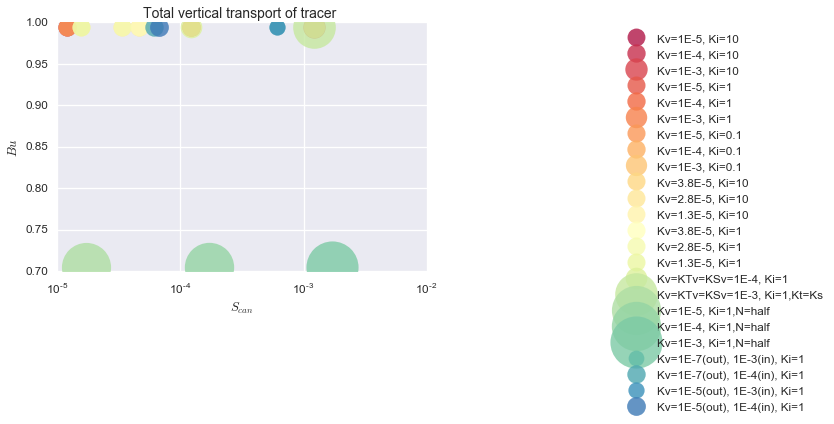

In [17]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(17,12))

jj=0
sizes = np.zeros(len(S_can))

sns.set_palette('Spectral',25)
for ii in indexList:
   
    ax7 = plt.subplot(3,3,7)
    sizeT = ((np.mean(vertical[10:,ii])/1.E4))*10.0
    sizes[ii] = sizeT
    plt.plot(S_can[ii],Bu[ii],'o', markersize = sizeT,alpha = 0.8,label = labels[ii])
    plt.xlabel('$S_{can}$')
    plt.ylabel('$Bu$')
    plt.title('Total vertical transport of tracer ')
    ax7.set_xscale("log", nonposy='clip')
    

    
plt.tight_layout()
ax7.legend(loc ='upper right', bbox_to_anchor=(2.1,1))
#ax2.legend(loc =0)



plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


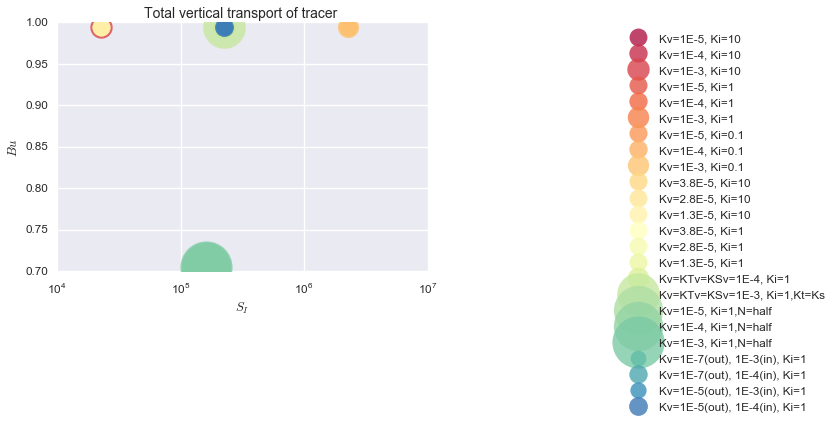

In [18]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(17,12))

jj=0
sizes = np.zeros(len(S_can))

sns.set_palette('Spectral',25)
for ii in indexList:
   
    ax7 = plt.subplot(3,3,7)
    sizeT = ((np.mean(vertical[10:,ii])/1.E4))*10.0
    sizes[ii] = sizeT
    plt.plot(S_I[ii],Bu[ii],'o', markersize = sizeT,alpha = 0.8,label = labels[ii])
    plt.xlabel('$S_{I}$')
    plt.ylabel('$Bu$')
    plt.title('Total vertical transport of tracer ')
    ax7.set_xscale("log", nonposy='clip')
    

    
plt.tight_layout()
ax7.legend(loc ='upper right', bbox_to_anchor=(2.1,1))
#ax2.legend(loc =0)



plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


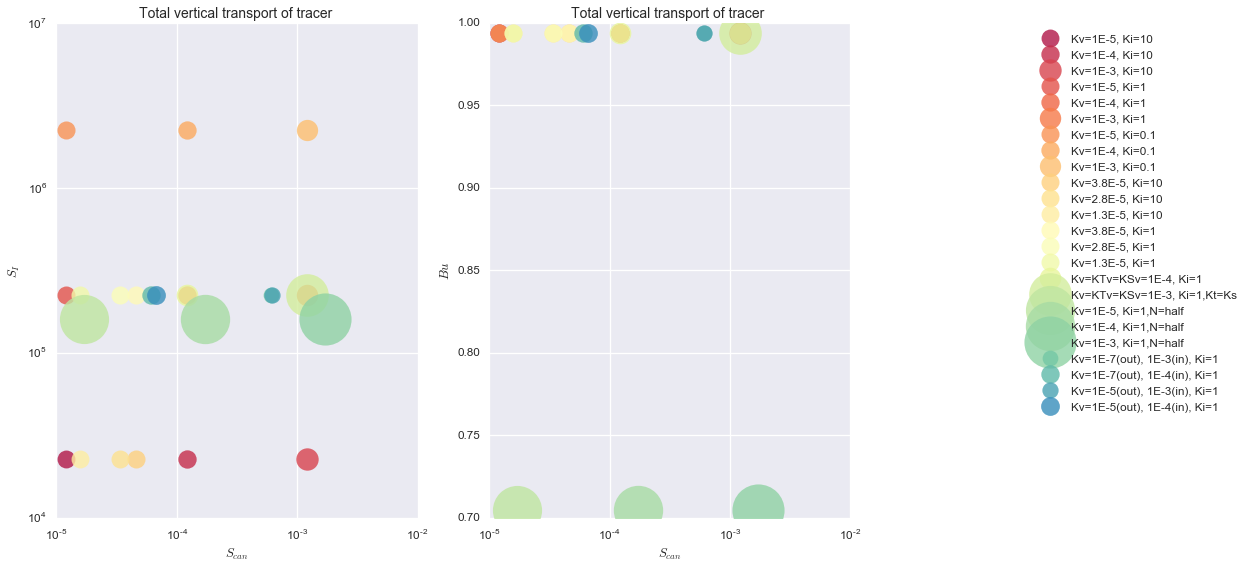

In [19]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})

fig42=plt.figure(figsize=(18,8))

jj=0
sizes = np.zeros(len(S_can))

sns.set_palette('Spectral',26)
for ii in indexList:
   
    ax7 = plt.subplot(1,3,1)
    sizeT = ((np.mean(vertical[10:,ii])/1.E4))*10.0
    sizes[ii] = sizeT
    plt.plot(S_can[ii],S_I[ii],'o', markersize = sizeT,alpha = 0.8,label = labels[ii])
    plt.xlabel('$S_{can}$')
    plt.ylabel('$S_I$')
    plt.title('Total vertical transport of tracer ')
    ax7.set_xscale("log", nonposy='clip')
    ax7.set_yscale("log", nonposy='clip')
    
    ax2 = plt.subplot(1,3,2)
    sizeT = ((np.mean(vertical[10:,ii])/1.E4))*10.0
    sizes[ii] = sizeT
    plt.plot(S_can[ii],Bu[ii],'o', markersize = sizeT,alpha = 0.8,label = labels[ii])
    plt.xlabel('$S_{can}$')
    plt.ylabel('$Bu$')
    plt.title('Total vertical transport of tracer ')
    ax2.set_xscale("log", nonposy='clip')
   
    

    
plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(2.1,1))
#ax2.legend(loc =0)



plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


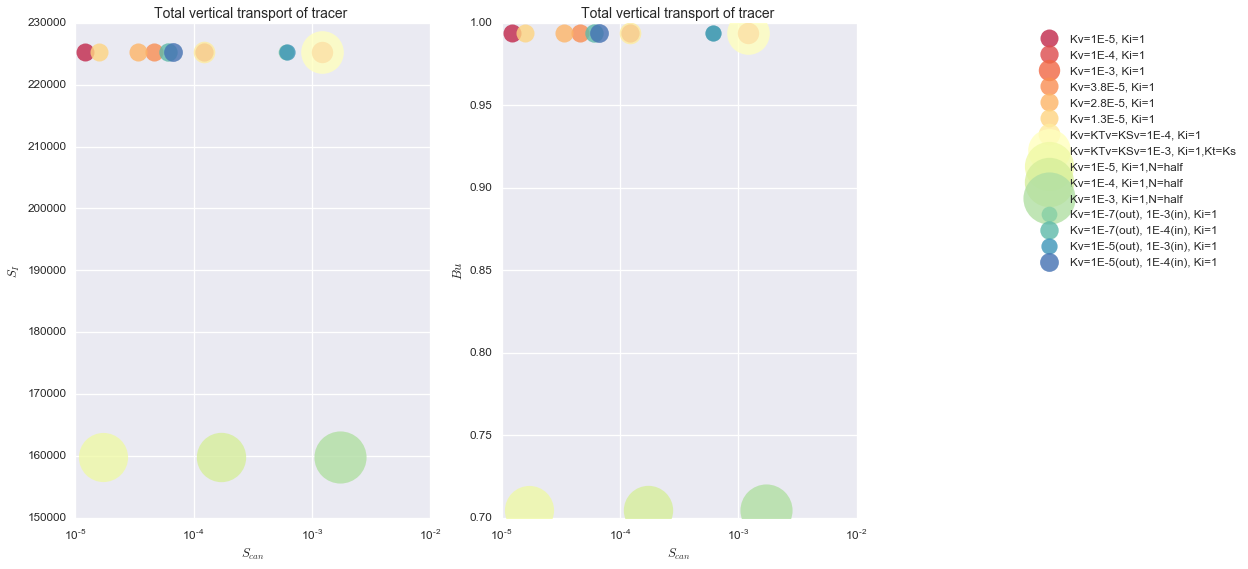

In [20]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})

fig42=plt.figure(figsize=(18,8))

indexNoKiso = [3,4,5,12,13,14,15,16,20,21,22,23,24,25,26]
jj=0
sizes = np.zeros(len(S_can))

sns.set_palette('Spectral',15)
for ii in indexNoKiso:
   
    ax7 = plt.subplot(1,3,1)
    sizeT = ((np.mean(vertical[10:,ii])/1.E4))*10.0
    sizes[ii] = sizeT
    plt.plot(S_can[ii],S_I[ii],'o', markersize = sizeT,alpha = 0.8,label = labels[ii])
    plt.xlabel('$S_{can}$')
    plt.ylabel('$S_I$')
    plt.title('Total vertical transport of tracer ')
    ax7.set_xscale("log", nonposy='clip')
    #ax7.set_yscale("log", nonposy='clip')
    
    ax2 = plt.subplot(1,3,2)
    sizeT = ((np.mean(vertical[10:,ii])/1.E4))*10.0
    sizes[ii] = sizeT
    plt.plot(S_can[ii],Bu[ii],'o', markersize = sizeT,alpha = 0.8,label = labels[ii])
    plt.xlabel('$S_{can}$')
    plt.ylabel('$Bu$')
    plt.title('Total vertical transport of tracer ')
    ax2.set_xscale("log", nonposy='clip')
   
    

    
plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(2.1,1))
#ax2.legend(loc =0)



plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


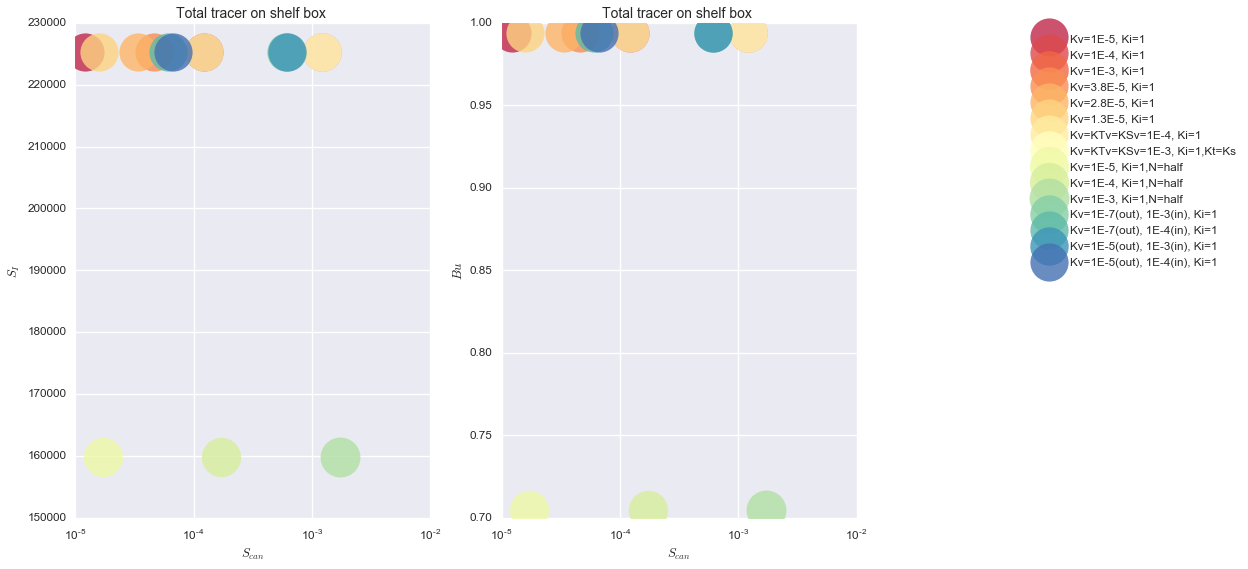

In [21]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})

fig42=plt.figure(figsize=(18,8))

indexNoKiso = [3,4,5,12,13,14,15,16,20,21,22,23,24,25,26]
jj=0
sizes = np.zeros(len(S_can))

sns.set_palette('Spectral',15)
for ii in indexNoKiso:
   
    ax7 = plt.subplot(1,3,1)
    sizeT = ((np.mean(TrOnSh[10:,ii])/1.E14))*40.0
    sizes[ii] = sizeT
    plt.plot(S_can[ii],S_I[ii],'o', markersize = sizeT,alpha = 0.8,label = labels[ii])
    plt.xlabel('$S_{can}$')
    plt.ylabel('$S_I$')
    plt.title('Total tracer on shelf box ')
    ax7.set_xscale("log", nonposy='clip')
    #ax7.set_yscale("log", nonposy='clip')
    
    ax2 = plt.subplot(1,3,2)
    sizeT = ((np.mean(TrOnSh[10:,ii])/1.E14))*40.0
    sizes[ii] = sizeT
    plt.plot(S_can[ii],Bu[ii],'o', markersize = sizeT,alpha = 0.8,label = labels[ii])
    plt.xlabel('$S_{can}$')
    plt.ylabel('$Bu$')
    plt.title('Total tracer on shelf box ')
    ax2.set_xscale("log", nonposy='clip')
   
    

    
plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(2.1,1))
#ax2.legend(loc =0)



plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


In [22]:
sizes

array([  0.        ,   0.        ,   0.        ,  38.17162284,
        38.21332428,  38.57674958,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        38.18368508,  38.17921022,  38.17283   ,  38.19535253,
        38.70838208,   0.        ,   0.        ,   0.        ,
        39.18465909,  39.27616658,  39.91245901,  38.40464   ,
        38.20104381,  38.40632816,  38.1995948 ])

So Bu is the most important then Sd and then SI. The three of them are necessary to explain the distribution of the dots.

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


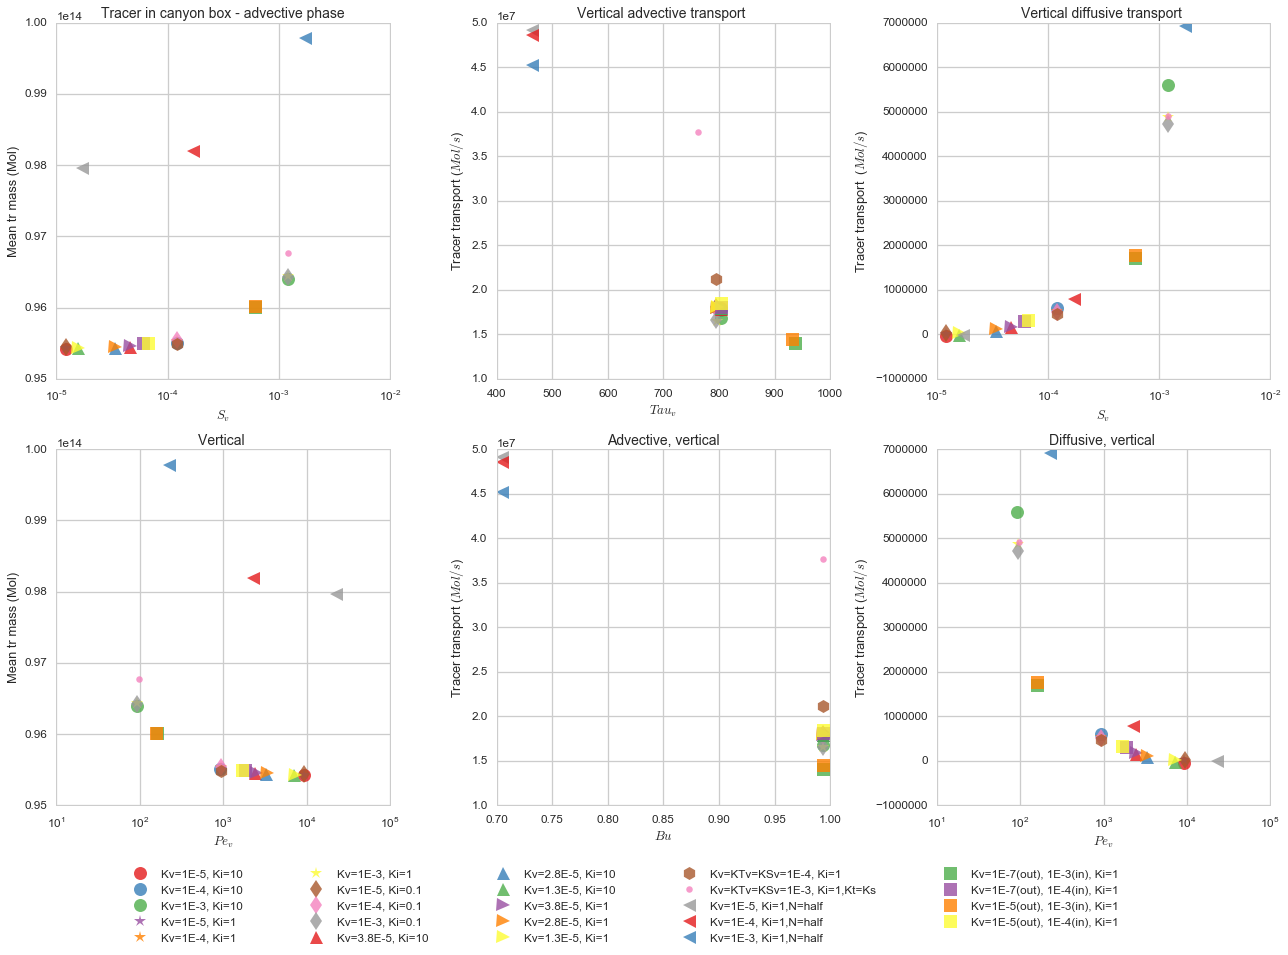

In [24]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(18,12))

sns.set_palette( 'Set1',9)

jj=0

for ii in indexList:
    ax1 = plt.subplot(2,3,1)
    plt.plot( S_can[ii] ,np.mean(TrOnSh[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean tr mass (Mol)')
    plt.xlabel('$S_v$')
    plt.title(' Tracer in canyon box - advective phase ')
    ax1.set_xscale("log", nonposy='clip')

    ax2 = plt.subplot(2,3,2)
    plt.plot(Tau_h[ii] , np.mean(verticala[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$Tau_v$')
    plt.title('Vertical advective transport ')
    #ax2.set_xscale("log", nonposy='clip')


    ax3 = plt.subplot(2,3,3)
    plt.plot(S_can[ii] ,np.mean(verticald[10:,ii])*1000.0 ,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport  ($Mol/s$)')
    plt.xlabel('$S_v$')
    plt.title('Vertical diffusive transport ')
    ax3.set_xscale("log", nonposy='clip')


    ax4 = plt.subplot(2,3,4)
    plt.plot(Pe_v[ii] ,np.mean(TrOnSh[10:,ii]) ,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean tr mass (Mol)')
    plt.xlabel('$Pe_v$')
    plt.title('Vertical ')
    ax4.set_xscale("log", nonposy='clip')


    ax5 = plt.subplot(2,3,5)
    plt.plot(Bu[ii] , np.mean(verticala[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$Bu$')
    plt.title('Advective, vertical')
    #ax5.set_xscale("log", nonposy='clip')

    ax6 = plt.subplot(2,3,6)
    plt.plot(Pe_v[ii] ,np.mean(verticald[10:,ii])*1000.0,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($Mol/s$)')
    plt.xlabel('$Pe_v$')
    plt.title('Diffusive, vertical ')
    ax6.set_xscale("log", nonposy='clip')
    
    jj=jj+1


plt.tight_layout()
ax4.legend(loc ='lower left',ncol=5, mode="expand", borderaxespad=0., bbox_to_anchor=(0.2, -0.4, 3,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


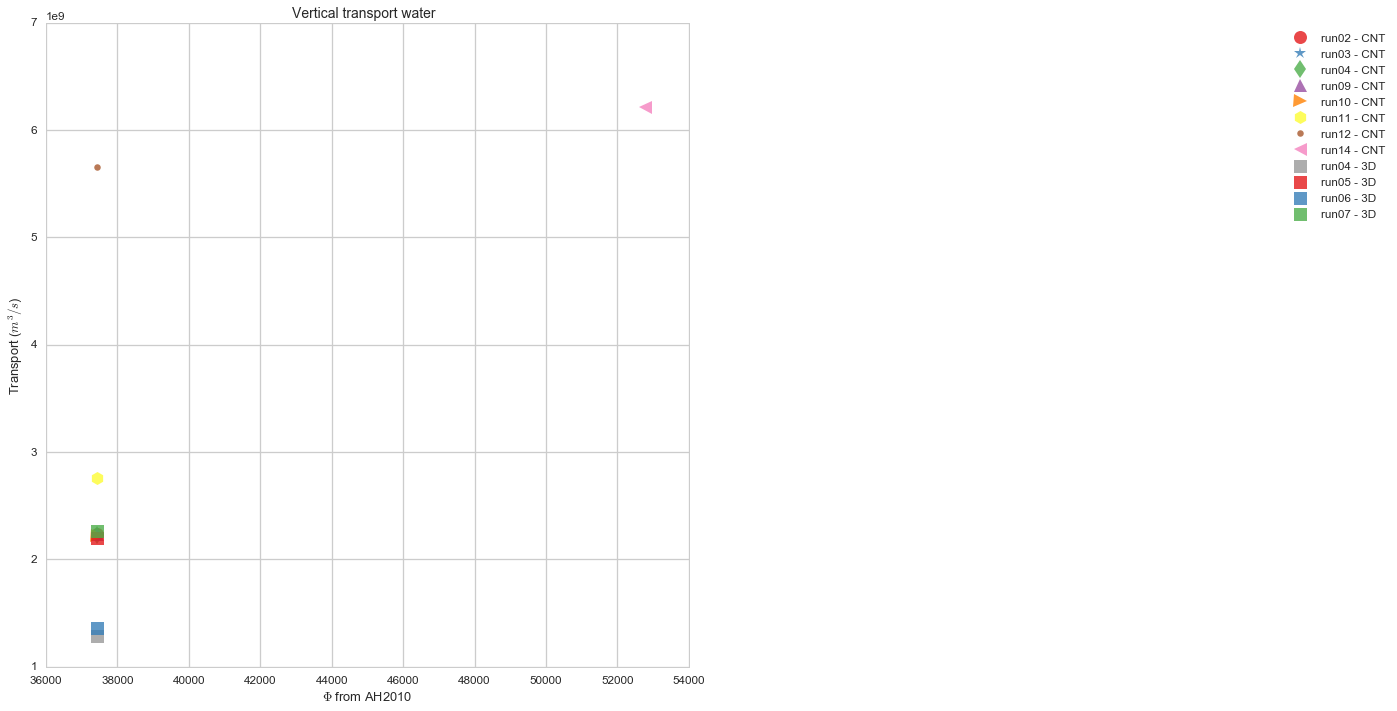

In [30]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(10,10))

wmarker = ['o','*','d','^','>','h','.','.','<','s','s','s','s']

windexList = [0,1,2,3,4,5,6,8,9,10,11,12]
transEqIndex = [0,3,6,9,12,15,16,20,23,24,25,26]

jj=0

for mm, ii in zip(transEqIndex,windexList):
    
    ax5 = plt.subplot(1,1,1)

    plt.plot(Phi_AH[mm],np.nanmean(watVert[10:,ii]),wmarker[ii], markersize = 13,alpha = 0.8,label = wlabels[ii])
    
    plt.ylabel('Transport ($m^3/s$)')
    plt.xlabel('$\Phi$ from AH2010')
    plt.title('Vertical transport water  ')
    #ax5.set_xscale("log", nonposy='clip')

plt.tight_layout()
ax5.legend(loc ='upper right', bbox_to_anchor=(2.1,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')
